# Week3 

#  data explore and Lexicon

> NLP

In [1]:
#check the differences between word_tokenize & TweetTokenize
import nltk
#nltk.download('punkt')

text = "This is a sample sentence. It contains multiple sentences."

#tokens = nltk.word_tokenize(text)
tokenizer = nltk.TweetTokenizer()
tokens = tokenizer.tokenize(text)
tokens
#print(tokens)

['This',
 'is',
 'a',
 'sample',
 'sentence',
 '.',
 'It',
 'contains',
 'multiple',
 'sentences',
 '.']

In [3]:
import re
text = 'Amazing save #FACup #zeebox https://stackoverflow.com/tiUya56M Ok'
text = re.sub(r' https?:\/\/\S*', '', text, flags=re.MULTILINE)
text

'Amazing save #FACup #zeebox Ok'

In [3]:
import nltk

> ## Lexicon based approach

### 1. VADER

In [4]:
#generated_tokens
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Load the VADER sentiment lexicon
analyzer = SentimentIntensityAnalyzer()
tweet = "I'm so happy to be here with my friends! #fun #goodtimes"
analyzer.polarity_scores(tweet)

{'neg': 0.0, 'neu': 0.428, 'pos': 0.572, 'compound': 0.893}

### 2. VADER and TextBlob

In [6]:
#testing two
import numpy as np
import nltk
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

tweets = "I'm so happy to be here with my friends! #fun #goodtimes"
tokens = nltk.word_tokenize(tweets.lower())

analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment of each tweet
for tweet in tokens:
    text = tweet
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        print(f"{text} - Positive")
    elif sentiment < 0:
        print(f"{text} - Negative")
    else:
        print(f"{text} - Neutral")
        
#
sentiment
analyzer.polarity_scores(tweets)

i - Neutral
'm - Neutral
so - Neutral
happy - Positive
to - Neutral
be - Neutral
here - Neutral
with - Neutral
my - Neutral
friends - Neutral
! - Neutral
# - Neutral
fun - Positive
# - Neutral
goodtimes - Neutral


{'neg': 0.0, 'neu': 0.428, 'pos': 0.572, 'compound': 0.893}

### Transformer Pipeline

In [7]:
from transformers import pipeline

# create a sentiment analysis pipeline using a pre-trained model
nlp = pipeline("sentiment-analysis")

# analyze the sentiment of a piece of text
text = "I love using the Transformers library!"
result = nlp(text)[0]

# print the sentiment label and score
print(f"Sentiment label: {result['label']}")
print(f"Sentiment score: {result['score']}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
DLL load failed while importing defs: The specified procedure could not be found.

In [8]:
import numpy as np
np.__version__

'1.24.2'

> ## tweet scraping

In [9]:
# method 1 : not sucessful
import pandas as pd
import requests
import os
import json
def connect_to_twitter():
    bearer_token = os.environ.get("BEARER_TOKEN")
    return {"Authorization": "Bearer {}".format(bearer_token)}
headers = connect_to_twitter()

def make_request(headers):
    url = "https://api.twitter.com/2/tweets/search/recent?query=ExtremeWeather"
    return requests.request("GET", url, headers=headers).json()
response = make_request(headers)
print(response)

{'title': 'Unauthorized', 'type': 'about:blank', 'status': 401, 'detail': 'Unauthorized'}


In [5]:
#method 2 from Twitter: not ok
import pandas as pd
import requests
import os
import json

def connect_to_twitter():
    bearer_token = os.environ.get("BEARER_TOKEN")
    return {"Authorization": "Bearer {}".format(bearer_token)}

headers = connect_to_twitter()

def make_request(headers):
    url = "https://api.twitter.com/2/tweets/search/recent"
       
    query_params = {'query': 'python'}
    return requests.request("GET", url, params=query_params,    headers=headers).json()
response = make_request(headers)
print(response)

{'title': 'Unauthorized', 'type': 'about:blank', 'status': 401, 'detail': 'Unauthorized'}


In [10]:
def make_request(headers):
    url = "https://api.twitter.com/2/tweets/search/recent"
    query_params = {'query': 'ExtremeWeather -is:retweet',
    'start_time': "2021–10–03T00:00:00.000Z",
    'start_time': "2021–10–03T23:59:00.000Z",
    'max_results': 15,
    'tweet.fields': 'id,text,geo,conversation_id,created_at',
    'user.fields': 'id,name,username,location',
    'place.fields': 'full_name,country',
    'next_token': {}}
    return requests.request("GET", url, params=query_params, headers=headers).json()
response = make_request(headers)
print(response)

{'title': 'Unauthorized', 'type': 'about:blank', 'status': 401, 'detail': 'Unauthorized'}


In [11]:
# method 3: Query on a particular userID and get the full tweet in Json format

import snscrape.modules.twitter as sntwitter
import pandas as pd
query="SCY_888"
tweets = []
limits = 100
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limits:
        break
    else:
        print(vars(tweet))

{'url': 'https://twitter.com/SCY_888/status/1633539740334161920', 'date': datetime.datetime(2023, 3, 8, 18, 46, 38, tzinfo=datetime.timezone.utc), 'rawContent': '"The only way to do great work is to love what you do." - Steve Jobs\n\nData5703 CS16-1 👍👍👍 https://t.co/LLBe6YAn5H', 'renderedContent': '"The only way to do great work is to love what you do." - Steve Jobs\n\nData5703 CS16-1 👍👍👍 https://t.co/LLBe6YAn5H', 'id': 1633539740334161920, 'user': User(username='SCY_888', id=1527150097942736896, displayname='Andy SC Yang', rawDescription='Oh My GOD!!', renderedDescription='Oh My GOD!!', descriptionLinks=None, verified=False, created=datetime.datetime(2022, 5, 19, 4, 52, 30, tzinfo=datetime.timezone.utc), followersCount=0, friendsCount=1, statusesCount=3, favouritesCount=1, listedCount=0, mediaCount=2, location='Australia', protected=False, link=None, profileImageUrl='https://pbs.twimg.com/profile_images/1527150180973150208/bjVhJEO__normal.png', profileBannerUrl=None, label=None), 'rep

In [12]:
#Loading the Dataset
import pandas as pd
data = pd.read_csv('tweet10k.csv')

In [13]:
data

,Unnamed: 0,Date,User,Tweet
0,0,2023-03-07 23:59:59+00:00,1275_dana,@GUMI_Splatoon3 How is your morning going so far?
1,1,2023-03-07 23:59:59+00:00,akikasatruther,@emusaysstuff Its so easy
2,2,2023-03-07 23:59:59+00:00,5eyedsnoop,"@AriDrennen @twanchovy @jessesingal Well, I’m ..."
3,3,2023-03-07 23:59:59+00:00,CommsroomC,AU's top 3 telcos are losing ground to smaller...
4,4,2023-03-07 23:59:59+00:00,PrimatesListing,A new primate has just been listed : Primate #...
...,...,...,...,...
9995,9995,2023-03-07 23:59:37+00:00,cherrynoa,hopefully that tweet gets taken down bc how do...
9996,9996,2023-03-07 23:59:37+00:00,quackittie_,@babiesapnap @carreislove welcome! gustó conoc...
9997,9997,2023-03-07 23:59:37+00:00,TexasLulu,@sarah_b1999 @BentCatTx @RedBison @BarnabyBeck...
9998,9998,2023-03-07 23:59:37+00:00,okiTwits,Use fufu to qualify for the quarter finals now


# EXPLORING 

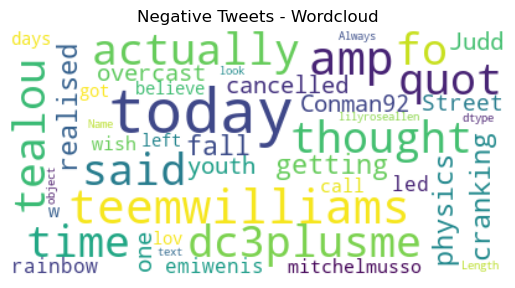

In [14]:
# understanding the negative words
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load the dataset
data = pd.read_csv('twitter_with_label.csv')

# Get the negative tweets and stop words
negative_tweets = data['text'][data["rating"] == 0]
stop_words = ["https", "co", "RT"] + list(STOPWORDS)

# Create a WordCloud of negative tweets
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, 
                               background_color="white", 
                               stopwords=stop_words).generate(str(negative_tweets))

# Plot the WordCloud
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
import numpy as np
pred = model.predict(X_test)
#.argmax(axis=1)
pred.argmax(axis=1)
#metrics.accuracy_score(pred.argmax(axis=1), y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [2]:
#Check the version of TensorFlow for DeepLearning
import tensorflow as tf
print(tf.__version__)
import os
print(os.environ['PATH'])

2.10.0
C:\Users\andy\anaconda3;C:\Users\andy\anaconda3\Library\mingw-w64\bin;C:\Users\andy\anaconda3\Library\usr\bin;C:\Users\andy\anaconda3\Library\bin;C:\Users\andy\anaconda3\Scripts;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Users\andy\AppData\Local\Microsoft\WindowsApps;C:\Program Files\Graphviz\bin;C:\ffmpeg\bin;
